No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.8112276085100195
Accuracy: 0.8386302099754597
Accuracy: 0.6933091436842164
Accuracy: 0.8094694631715553
Accuracy: 0.7893983525489149
Accuracy: 0.9258902208655818
Accuracy: 0.8856323886645407
Accuracy: 0.8223052320029626
Accuracy: 0.7500064471148707
Accuracy: 0.8282095618830232
Accuracy: 0.808264113521414
Accuracy: 0.8235449868514567
Accuracy: 0.8121292378200765
Accuracy: 0.8807042105370823
Accuracy: 0.8520279513100095
Accuracy: 0.8118305676178493
Accuracy: 0.8112978250523015
Accuracy: 0.8130503325323009
Accuracy: 0.7653265911485496
Accuracy: 0.9136149363441588
-------------------------
Coefficient: 
 [ 0.1495828   0.98483654  0.03860766 -0.29841299 -0.21435018]
Intercept: 
 -1.4902406096302432
-------------------------
11.242914412373816 [12 11 16  1  1] 12
4.387342371647255 [6 5 7 0 1] 6
12.828510555273484 [13 13  0  0  2] 13
8.599694438277668 [9 9 8 0 2] 9
7.682377543956319 [11  8  2  0  2] 8
9.352885024827557 [ 9 10  2  0  2] 10
4.216447682647935 [ 5  5 12  0  2] 5
15.10

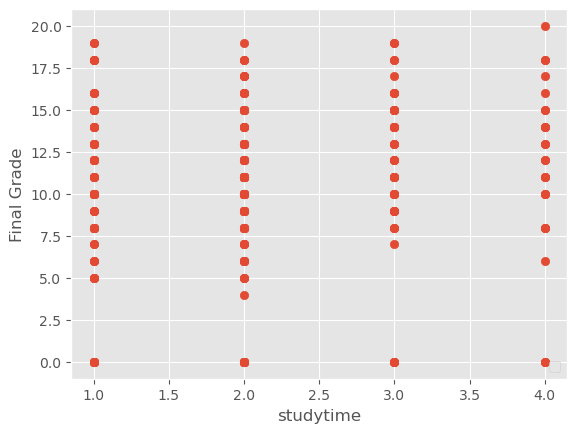

In [19]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use("ggplot")


data = pd.read_csv(r"C:\Users\selimonceldtan\Desktop\student_mat_2173a47420.csv", sep=";")


predict = "G3"
data = data[["G1", "G2", "absences", "failures", "studytime", "G3"]]
data = shuffle(data)  


X = np.array(data.drop([predict], axis=1)) 
y = np.array(data[predict])


x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)


best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)


pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")


predicted = linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])


plot = "studytime"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()


In [21]:
import numpy as np
import pickle


pickle_in = open("studentgrades.pickle", "rb")  
linear = pickle.load(pickle_in)  


X_new = np.array([[10, 12, 3, 0, 2],   
                  [14, 15, 0, 0, 1],  
                  [7, 9, 6, 1, 4]])   


predictions = linear.predict(X_new)


print("Predictions for the new data:")
print(predictions)

Predictions for the new data:
[11.51074858 15.16211663  7.49620016]


In [22]:
acc = linear.score(x_test, y_test)  
print("Model Accuracy: ", acc)


Model Accuracy:  0.9193200597161074


In [24]:

predictions = linear.predict(x_test)


print("Predictions and Actual values:")
print("Predicted\tActual")  
for predicted, actual in zip(predictions, y_test):  
    print(f"{predicted:.2f}\t\t{actual}")



Predictions and Actual values:
Predicted	Actual
11.24		12
4.39		6
12.83		13
8.60		9
7.68		8
9.35		10
4.22		5
15.10		15
11.25		12
9.13		12
12.22		12
10.10		10
15.32		15
12.68		13
10.08		10
12.61		13
9.34		11
9.49		10
11.19		11
15.67		15
10.49		11
4.13		6
18.57		18
9.43		10
11.31		12
8.00		9
12.06		13
14.03		13
10.44		10
12.55		12
6.89		7
7.33		7
17.87		17
10.35		10
11.77		11
11.86		13
14.95		15
7.46		10
9.28		9
-1.02		0
